In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) =cifar10.load_data()

In [3]:
X_train.shape


(50000, 32, 32, 3)

In [4]:
50000/32

1562.5

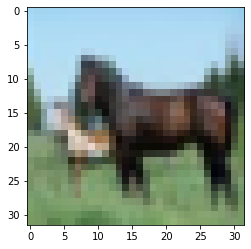

In [5]:
plt.imshow(X_train[12])

In [6]:
X_train[0].max,X_train[0].min

(<function ndarray.max>, <function ndarray.min>)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [11]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))

#output layer -softmax-->multiclass classifcation
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop =EarlyStopping(monitor="val_loss",patience=2)

In [15]:
model.fit(X_train,
          y_cat_train,
          epochs=15,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5034 - accuracy: 0.4592 - val_loss: 1.2941 - val_accuracy: 0.5359
Epoch 2/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1648 - accuracy: 0.5884 - val_loss: 1.1179 - val_accuracy: 0.6158
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0168 - accuracy: 0.6436 - val_loss: 1.0001 - val_accuracy: 0.6475
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9106 - accuracy: 0.6821 - val_loss: 1.0032 - val_accuracy: 0.6487
Epoch 5/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8203 - accuracy: 0.7150 - val_loss: 0.9776 - val_accuracy: 0.6671
Epoch 6/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7431 - accuracy: 0.7410 - val_loss: 0.9585 - val_accuracy: 0.6765
Epoch 7/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6745 - accuracy: 0.7656 - val_loss: 0.9452 -

In [16]:
metrics =pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.503378,0.45924,1.294132,0.5359
1,1.164843,0.58836,1.117947,0.6158
2,1.016769,0.64362,1.000127,0.6475
3,0.910585,0.68206,1.003173,0.6487
4,0.820264,0.71500,0.977637,0.6671
5,0.743068,0.74104,0.958487,0.6765
6,0.674471,0.76564,0.945161,0.6838
7,0.608209,0.78924,1.053074,0.6663
8,0.542740,0.81008,1.040456,0.6740


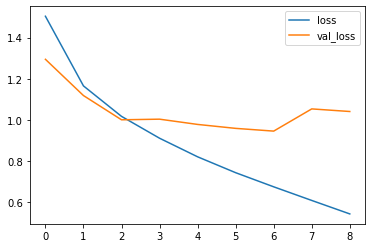

In [17]:
metrics[["loss","val_loss"]].plot()

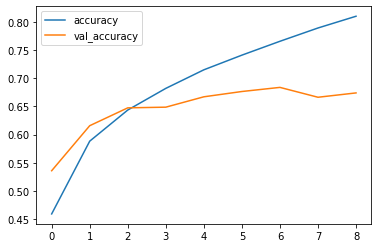

In [18]:
metrics[["accuracy","val_accuracy"]].plot()

In [19]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.0405 - accuracy: 0.6740


[1.040455937385559, 0.6740000247955322]

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions =model.predict(X_test)

In [21]:
import tensorflow as tf
predictions=tf.round(predictions)
predictions[:10]
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.84      0.75      0.79      1000
           2       0.67      0.42      0.52      1000
           3       0.55      0.43      0.48      1000
           4       0.71      0.56      0.63      1000
           5       0.64      0.47      0.54      1000
           6       0.79      0.74      0.76      1000
           7       0.74      0.74      0.74      1000
           8       0.85      0.71      0.77      1000
           9       0.72      0.79      0.75      1000

   micro avg       0.73      0.62      0.67     10000
   macro avg       0.73      0.62      0.67     10000
weighted avg       0.73      0.62      0.67     10000
 samples avg       0.62      0.62      0.62     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


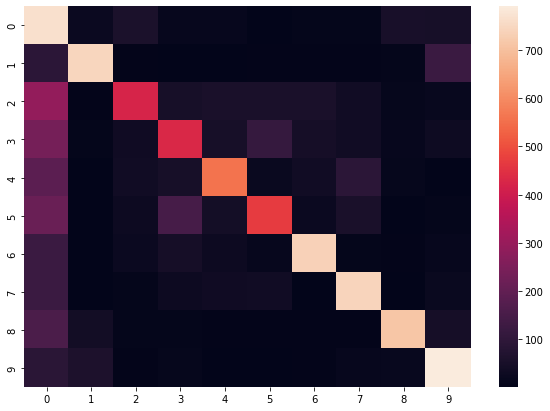

In [22]:

import seaborn as sns
rounded_labels=np.argmax(predictions, axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,rounded_labels))

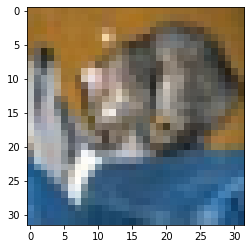

In [25]:
my_image=X_test[0]
plt.imshow(my_image.reshape(32,32,3))

In [26]:
predcit=model.predict(my_image.reshape(1,32,32,3))
predict=tf.round(predcit)
import numpy as np
rounded_labels=np.argmax(predict, axis=1)
rounded_labels

array([3])